In [1]:
import keras
import PIL
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import os, shutil

In [5]:
base_dir = 'C:/dev/python_projects/data/cats_and_dogs_small'
# os.mkdir(base_dir)

In [6]:
train_dir = os.path.join(base_dir , 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir , 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir , 'test')
# os.mkdir(test_dir)
# # Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# # Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# # Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# # Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# # Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# # Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [7]:
original_dataset_dir = 'C:/dev/python_projects/data/convnet_data/train'
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# # Copy next 500 cat images to validation_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 cat images to test_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy first 1000 dog images to train_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 dog images to validation_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 dog images to test_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy' , optimizer = optimizers.RMSprop(lr = 1e-4) , metrics = ['acc'])

In [12]:
#data preprocessing
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir , target_size = (150 , 150) , batch_size = 20 , class_mode='binary')
validation_generator =test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 183s 2s/step - loss: 0.6877 - acc: 0.5340 - val_loss: 0.6722 - val_acc: 0.6120
Epoch 2/30
100/100 [==============================] - 189s 2s/step - loss: 0.6588 - acc: 0.6055 - val_loss: 0.6468 - val_acc: 0.6140
Epoch 3/30
100/100 [==============================] - 203s 2s/step - loss: 0.6086 - acc: 0.6685 - val_loss: 0.6195 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 173s 2s/step - loss: 0.5700 - acc: 0.7025 - val_loss: 0.6574 - val_acc: 0.6170
Epoch 5/30
100/100 [==============================] - 205s 2s/step - loss: 0.5365 - acc: 0.7250 - val_loss: 0.5995 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 189s 2s/step - loss: 0.5080 - acc: 0.7500 - val_loss: 0.5921 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 202s 2s/step - loss: 0.4735 - acc: 0.7705 - val_loss: 0.5973 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 178s 2s/step - 

In [16]:
model.save('C:/dev/python_projects/data/Model/cats_and_dogs_small_1.h5')

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [20]:
#Data Agumentation
# Data augmentation takes the approach of generating more training data from existing training samples, 
# by "augmenting" the samples via a number of random transformations that yield believable-looking images.

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures.
# width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
# shear_range is for randomly applying shearing transformations.
# zoom_range is for randomly zooming inside pictures.
# horizontal_flip is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
# fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

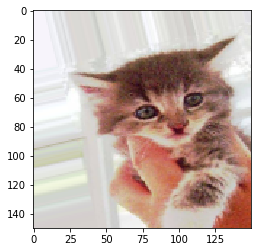

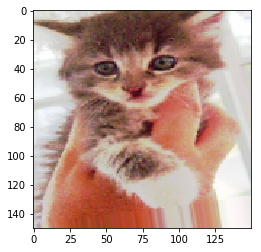

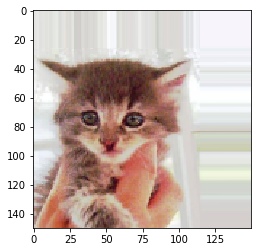

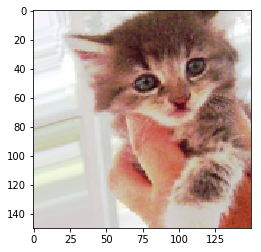

In [21]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir , fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path , target_size = (150 , 150))

x = image.img_to_array(img)
x = x.reshape((1 , ) + x.shape)

i = 0
for batch in datagen.flow(x , batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 215s 2s/step - loss: 0.6931 - acc: 0.5269 - val_loss: 0.6763 - val_acc: 0.5501
Epoch 2/10
100/100 [==============================] - 201s 2s/step - loss: 0.6786 - acc: 0.5697 - val_loss: 0.7198 - val_acc: 0.5013
Epoch 3/10
100/100 [==============================] - 224s 2s/step - loss: 0.6693 - acc: 0.5797 - val_loss: 0.7035 - val_acc: 0.5114
Epoch 4/10
100/100 [==============================] - 229s 2s/step - loss: 0.6515 - acc: 0.6059 - val_loss: 0.6196 - val_acc: 0.6501
Epoch 5/10
100/100 [==============================] - 222s 2s/step - loss: 0.6404 - acc: 0.6369 - val_loss: 0.6270 - val_acc: 0.6371
Epoch 6/10
100/100 [==============================] - 206s 2s/step - loss: 0.6260 - acc: 0.6459 - val_loss: 0.5878 - val_acc: 0.6643
Epoch 7/10
100/100 [==============================] - 218s 2s/step - loss: 0.5959 - acc: 0.6784 - val_loss: 0.5867 - val_acc: 0.6770
Epoch 8/10
100/100 [==============================] - 224s 2s/step - 

In [27]:
model.save('C:/dev/python_projects/data/Model/cats_and_dogs_small_2.h5')

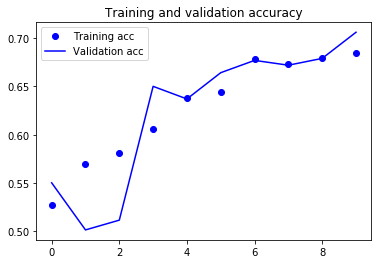

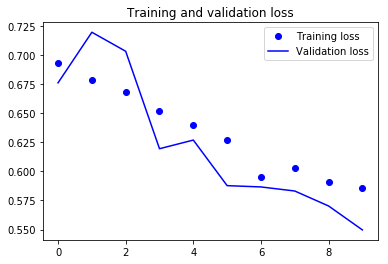

In [28]:
#plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
